# Download Dataset
1. Download from Kaggle Link: [Iowa Liquor Sales
](https://www.kaggle.com/datasets/stealthtechnologies/iowa-liquor-sales)
2. Download from Google Drive

In [ ]:
!gdown 13fw4qwSDRLJ7XH-y1rDAaHz-f6D0nkLB

Downloading...
From (original): https://drive.google.com/uc?id=13fw4qwSDRLJ7XH-y1rDAaHz-f6D0nkLB
From (redirected): https://drive.google.com/uc?id=13fw4qwSDRLJ7XH-y1rDAaHz-f6D0nkLB&confirm=t&uuid=626a2af9-abf2-4d7a-87bd-fbe0f598152c
To: /content/Iowa_Liquor_Sales.zip
100% 1.09G/1.09G [00:17<00:00, 63.8MB/s]


In [ ]:
!unzip Iowa_Liquor_Sales.zip

Archive:  Iowa_Liquor_Sales.zip
  inflating: iowa_dataset.csv        


# Process Data

In [ ]:
import pandas as pd

In [ ]:
# Get all column names
all_columns = pd.read_csv('iowa_dataset.csv', nrows=0).columns.tolist()
all_columns

['invoice_line_no',
 'date',
 'store',
 'name',
 'address',
 'city',
 'zipcode',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'vendor_no',
 'vendor_name',
 'itemno',
 'im_desc',
 'pack',
 'bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'sale_bottles',
 'sale_dollars',
 'sale_liters',
 'sale_gallons',
 ':@computed_region_3r5t_5243',
 ':@computed_region_wnea_7qqw',
 ':@computed_region_i9mz_6gmt',
 ':@computed_region_uhgg_e8y2',
 ':@computed_region_e7ym_nrbf']

In [ ]:
# Slice the first 24 columns (0–23)
selected_columns = all_columns[:24]
selected_columns

['invoice_line_no',
 'date',
 'store',
 'name',
 'address',
 'city',
 'zipcode',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'vendor_no',
 'vendor_name',
 'itemno',
 'im_desc',
 'pack',
 'bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'sale_bottles',
 'sale_dollars',
 'sale_liters',
 'sale_gallons']

## Reading Big file strategy


### Step 1: Read the first 1 million rows

In [ ]:
df_first = pd.read_csv(
    'iowa_dataset.csv',
    usecols=selected_columns,
    nrows=1_000_000
)

/tmp/ipython-input-8-343250366.py:1: DtypeWarning: Columns (6,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_first = pd.read_csv(


In [ ]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   invoice_line_no      1000000 non-null  object 
 1   date                 1000000 non-null  object 
 2   store                1000000 non-null  int64  
 3   name                 1000000 non-null  object 
 4   address              993904 non-null   object 
 5   city                 993903 non-null   object 
 6   zipcode              993912 non-null   object 
 7   store_location       919061 non-null   object 
 8   county_number        991839 non-null   object 
 9   county               993481 non-null   object 
 10  category             998518 non-null   object 
 11  category_name        998563 non-null   object 
 12  vendor_no            999999 non-null   object 
 13  vendor_name          999999 non-null   object 
 14  itemno               1000000 non-null  object 
 15 

In [ ]:
type(df_first['address'][0])

str

In [ ]:
df_first.head()

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
0,INV-14877300005,2018-10-05T00:00:00.000,4073,"UPTOWN LIQUOR, LLC",306 HWY 69 SOUTH,FOREST CITY,50436.0,"{'type': 'Point', 'coordinates': [-93.633306, ...",95,WINNEBAGO,...,20248,OLD CROW,6.0,1750.0,10.49,15.74,6.0,94.44,10.5,2.77
1,INV-14877700031,2018-10-05T00:00:00.000,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,"{'type': 'Point', 'coordinates': [-95.847163, ...",78,POTTAWATTAMIE,...,34007,ABSOLUT SWEDISH VODKA 80PRF,12.0,1000.0,14.99,22.49,12.0,269.88,12.0,3.17
2,INV-14888100048,2018-10-08T00:00:00.000,2560,HY-VEE FOOD STORE / MARION,3600 BUSINESS HWY 151 EAST,MARION,52302.0,NaN,57,LINN,...,82606,DEKUYPER SOUR APPLE PUCKER,12.0,750.0,6.47,9.71,6.0,58.26,4.5,1.18
3,INV-14909900102,2018-10-08T00:00:00.000,4152,FOOD LAND SUPER MARKETS,407 W HURON,MISSOURI VALLEY,51555.0,"{'type': 'Point', 'coordinates': [-95.899346, ...",43,HARRISON,...,36308,HAWKEYE VODKA,6.0,1750.0,7.17,10.76,6.0,64.56,10.5,2.77
4,INV-14941300020,2018-10-09T00:00:00.000,4647,B AND B EAST / WATERLOO,1615 BISHOP AVE,WATERLOO,50707.0,"{'type': 'Point', 'coordinates': [-92.293057, ...",07,BLACK HAWK,...,10803,CROWN ROYAL REGAL APPLE MINI,10.0,300.0,7.35,11.03,4.0,44.12,1.2,0.31


In [ ]:
df_first.to_csv('total_sale.csv', index=False)

### Step 2: Read the rest in chunks of 100k rows (simulate it as monthly data)

In [ ]:
reader = pd.read_csv('iowa_dataset.csv', usecols=selected_columns, chunksize=100_000)

In [ ]:
output_folder = 'chunks_output'
os.makedirs(output_folder, exist_ok=True)

In [ ]:
for i, chunk in enumerate(reader, start=1):
    if i <= 10:
        continue  # skip first 10 chunks (first 1M rows)

    if i == 15:
        break # Take next 5 files

    output_path = os.path.join(output_folder, f'chunk_{i:02d}.csv')
    chunk.to_csv(output_path, index=False)
    print(f"Exported {output_path}, shape: {chunk.shape}")

/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (6,8,10,12,14,18,19,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):
/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (6,8,10,12,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):
/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (6,18,19,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):
/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):
/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (6,8,10,12,14,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):
/tmp/i

Exported chunks_output/chunk_11.csv, shape: (100000, 24)


/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (8,10,12,14,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):


Exported chunks_output/chunk_12.csv, shape: (100000, 24)


/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (6,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):


Exported chunks_output/chunk_13.csv, shape: (100000, 24)


/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (8,10,12,14,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):


Exported chunks_output/chunk_14.csv, shape: (100000, 24)


/tmp/ipython-input-23-2917464963.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader, start=1):


In [ ]:
!zip -r monthly_sales.zip chunks_output

  adding: chunks_output/ (stored 0%)
  adding: chunks_output/chunk_14.csv (deflated 78%)
  adding: chunks_output/chunk_11.csv (deflated 78%)
  adding: chunks_output/chunk_13.csv (deflated 78%)
  adding: chunks_output/chunk_12.csv (deflated 78%)


# View data (Preprocessing in Transformation)

In [ ]:
df = pd.read_csv(
    'iowa_dataset.csv',
    usecols=selected_columns,
    nrows=100_000
)

/tmp/ipython-input-136-2839263925.py:1: DtypeWarning: Columns (6,8,10,12,14,18,19,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [ ]:
df.head()

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
0,INV-14877300005,2018-10-05T00:00:00.000,4073,"UPTOWN LIQUOR, LLC",306 HWY 69 SOUTH,FOREST CITY,50436.0,"{'type': 'Point', 'coordinates': [-93.633306, ...",95,WINNEBAGO,...,20248,OLD CROW,6.0,1750.0,10.49,15.74,6.0,94.44,10.5,2.77
1,INV-14877700031,2018-10-05T00:00:00.000,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,"{'type': 'Point', 'coordinates': [-95.847163, ...",78,POTTAWATTAMIE,...,34007,ABSOLUT SWEDISH VODKA 80PRF,12.0,1000.0,14.99,22.49,12.0,269.88,12.0,3.17
2,INV-14888100048,2018-10-08T00:00:00.000,2560,HY-VEE FOOD STORE / MARION,3600 BUSINESS HWY 151 EAST,MARION,52302.0,NaN,57,LINN,...,82606,DEKUYPER SOUR APPLE PUCKER,12.0,750.0,6.47,9.71,6.0,58.26,4.5,1.18
3,INV-14909900102,2018-10-08T00:00:00.000,4152,FOOD LAND SUPER MARKETS,407 W HURON,MISSOURI VALLEY,51555.0,"{'type': 'Point', 'coordinates': [-95.899346, ...",43,HARRISON,...,36308,HAWKEYE VODKA,6.0,1750.0,7.17,10.76,6.0,64.56,10.5,2.77
4,INV-14941300020,2018-10-09T00:00:00.000,4647,B AND B EAST / WATERLOO,1615 BISHOP AVE,WATERLOO,50707.0,"{'type': 'Point', 'coordinates': [-92.293057, ...",07,BLACK HAWK,...,10803,CROWN ROYAL REGAL APPLE MINI,10.0,300.0,7.35,11.03,4.0,44.12,1.2,0.31


## Handle Duplicated

### Full sample duplication

In [ ]:
df_full_duplicated = df[df.duplicated(keep=False)]
print(len(df_full_duplicated))
print(len(df_full_duplicated.drop_duplicates()))
df_full_duplicated.head()

2018
1009


,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
14000,INV-15181500011,2018-10-22T00:00:00.000,5364,STATION MART,3594 LAFAYETTE ROAD,EVANSDALE,50707.0,"{'type': 'Point', 'coordinates': [-92.287994, ...",07,BLACK HAWK,...,86668,JACK DANIELS TENNESSEE HONEY MINI,12.0,500.0,9.06,13.59,1.0,13.59,0.5,0.13
14001,INV-15172700084,2018-10-22T00:00:00.000,2578,HY-VEE / CHARLES CITY,901 KELLY ST,CHARLES CITY,50616.0,"{'type': 'Point', 'coordinates': [-92.675068, ...",34,FLOYD,...,43121,BACARDI SUPERIOR MINI,12.0,500.0,5.54,8.31,1.0,8.31,0.5,0.13
14002,INV-15112800194,2018-10-17T00:00:00.000,2625,HY-VEE WINE & SPIRITS #2 / DAVENPORT,3301 W KIMBERLY RD,DAVENPORT,52804.0,NaN,82,SCOTT,...,69658,DR. MCGILLICUDDY'S MENTHOLMINT,6.0,1750.0,14.66,21.99,6.0,131.94,10.5,2.77
14003,INV-15217800109,2018-10-23T00:00:00.000,4167,"IOWA STREET MARKET, INC.",1256 IOWA ST,DUBUQUE,52001.0,"{'type': 'Point', 'coordinates': [-90.668138, ...",31,DUBUQUE,...,34505,SOBIESKI,12.0,1000.0,7.0,10.5,2.0,21.0,2.0,0.52
14004,INV-15176500004,2018-10-22T00:00:00.000,4051,FAREWAY STORES #639 / MAQUOKETA,110 WESTGATE DR,MAQUOKETA,52060.0,"{'type': 'Point', 'coordinates': [-90.680623, ...",49,JACKSON,...,73055,RUMCHATA,12.0,750.0,12.5,18.75,12.0,225.0,9.0,2.37


### Full duplication and just duplicate invoice_line_no, store

In [ ]:
df_duplicated = df[df.duplicated(subset=['invoice_line_no', 'store'], keep=False)]
print(len(df_duplicated))
df_duplicated.tail()

5872


,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
99995,INV-15612400045,2018-11-09T00:00:00.000,4183,FAREWAY STORES #589 / DECORAH,103 E MAIN,DECORAH,52101.0,"{'type': 'Point', 'coordinates': [-91.785286, ...",96.0,WINNESHIEK,...,82847,DEKUYPER LUSCIOUS PEACHTREE,12.0,1000.0,7.87,11.81,2.0,23.62,2.00,0.52
99996,INV-15672400041,2018-11-13T00:00:00.000,2624,HY-VEE #2 / DUBUQUE,2395 NW ARTERIAL RD,DUBUQUE,52002.0,"{'type': 'Point', 'coordinates': [-90.741064, ...",31.0,DUBUQUE,...,39669,360 LIME MINI,6.0,500.0,4.9,7.35,1.0,7.35,0.50,0.13
99997,INV-15611700005,2018-11-09T00:00:00.000,5537,PRONTO MARKET / SUMNER,117 W 1ST ST,SUMNER,50674.0,"{'type': 'Point', 'coordinates': [-92.098713, ...",9.0,BREMER,...,11346,SEAGRAMS VO CANADIAN WHISKEY,12.0,750.0,7.5,11.25,3.0,33.75,2.25,0.59
99998,INV-15642300070,2018-11-12T00:00:00.000,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,"{'type': 'Point', 'coordinates': [-91.158407, ...",29.0,DES MOINES,...,63812,TGIFRIDAYS ULTIMATE MUDSLIDE,6.0,1750.0,7.52,11.28,6.0,67.68,10.50,2.77
99999,INV-15746000092,2018-11-15T00:00:00.000,2595,HY-VEE WINE AND SPIRITS / DENISON,"1620 4TH AVE, SOUTH",DENISON,51442.0,"{'type': 'Point', 'coordinates': [-95.348601, ...",24.0,CRAWFORD,...,56196,PAUL MASSON PEACH GRANDE AMBER BRANDY,12.0,750.0,6.29,9.44,1.0,9.44,0.75,0.19


In [ ]:
# Check example of duplicattion
df_duplicated[(df_duplicated["store"] == 5364) & (df_duplicated["invoice_line_no"] == "INV-15181500011")]

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
14000,INV-15181500011,2018-10-22T00:00:00.000,5364,STATION MART,3594 LAFAYETTE ROAD,EVANSDALE,50707.0,"{'type': 'Point', 'coordinates': [-92.287994, ...",07,BLACK HAWK,...,86668,JACK DANIELS TENNESSEE HONEY MINI,12.0,500.0,9.06,13.59,1.0,13.59,0.5,0.13
22820,INV-15181500011,2018-10-22T00:00:00.000,5364,STATION MART,3594 LAFAYETTE ROAD,EVANSDALE,50707.0,"{'type': 'Point', 'coordinates': [-92.287994, ...",07,BLACK HAWK,...,86668,JACK DANIELS TENNESSEE HONEY MINI,12.0,500.0,9.06,13.59,1.0,13.59,0.5,0.13


In [ ]:
df_duplicated[(df_duplicated["store"] == 4183) & (df_duplicated["invoice_line_no"] == "INV-15612400045")]

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
75123,INV-15612400045,2018-11-09T00:00:00.000,4183,FAREWAY STORES #589 / DECORAH,103 E MAIN,DECORAH,52101.0,96,WINNESHIEK,1081400,...,DEKUYPER LUSCIOUS PEACHTREE,12,1000.0,7.87,11.81,2,23.62,2.00,0.52,"{'type': 'Point', 'coordinates': [-91.785286, ..."
99995,INV-15612400045,2018-11-09T00:00:00.000,4183,FAREWAY STORES #589 / DECORAH,103 E MAIN,DECORAH,52101.0,"{'type': 'Point', 'coordinates': [-91.785286, ...",96.0,WINNESHIEK,...,82847,DEKUYPER LUSCIOUS PEACHTREE,12.0,1000.00,7.87,11.81,2.00,23.62,2.00,0.52


In [ ]:
df_duplicated[(df_duplicated["store"] == 3562) & (df_duplicated["invoice_line_no"] == "INV-15642300070")]

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
75126,INV-15642300070,2018-11-12T00:00:00.000,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,29,DES MOINES,1071100,...,TGIFRIDAYS ULTIMATE MUDSLIDE,6,1750.0,7.52,11.28,6,67.68,10.50,2.77,"{'type': 'Point', 'coordinates': [-91.158407, ..."
99998,INV-15642300070,2018-11-12T00:00:00.000,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,"{'type': 'Point', 'coordinates': [-91.158407, ...",29.0,DES MOINES,...,63812,TGIFRIDAYS ULTIMATE MUDSLIDE,6.0,1750.00,7.52,11.28,6.00,67.68,10.50,2.77


In [ ]:
df_update = df[df.duplicated(subset=['invoice_line_no', 'store'])]
df_update[df_update['invoice_line_no'] == "INV-15642300070"]

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
99998,INV-15642300070,2018-11-12T00:00:00.000,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,"{'type': 'Point', 'coordinates': [-91.158407, ...",29.0,DES MOINES,...,63812,TGIFRIDAYS ULTIMATE MUDSLIDE,6.0,1750.0,7.52,11.28,6.0,67.68,10.5,2.77


### Drop duplicated

In [ ]:
df = df[df.duplicated(subset=['invoice_line_no', 'store'], keep='first') | ~df.duplicated(subset=['invoice_line_no', 'store'], keep=False)]
df

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
0,INV-14877300005,2018-10-05T00:00:00.000,4073,"UPTOWN LIQUOR, LLC",306 HWY 69 SOUTH,FOREST CITY,50436.0,"{'type': 'Point', 'coordinates': [-93.633306, ...",95,WINNEBAGO,...,20248,OLD CROW,6.0,1750.0,10.49,15.74,6.0,94.44,10.50,2.77
1,INV-14877700031,2018-10-05T00:00:00.000,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,"{'type': 'Point', 'coordinates': [-95.847163, ...",78,POTTAWATTAMIE,...,34007,ABSOLUT SWEDISH VODKA 80PRF,12.0,1000.0,14.99,22.49,12.0,269.88,12.00,3.17
2,INV-14888100048,2018-10-08T00:00:00.000,2560,HY-VEE FOOD STORE / MARION,3600 BUSINESS HWY 151 EAST,MARION,52302.0,NaN,57,LINN,...,82606,DEKUYPER SOUR APPLE PUCKER,12.0,750.0,6.47,9.71,6.0,58.26,4.50,1.18
3,INV-14909900102,2018-10-08T00:00:00.000,4152,FOOD LAND SUPER MARKETS,407 W HURON,MISSOURI VALLEY,51555.0,"{'type': 'Point', 'coordinates': [-95.899346, ...",43,HARRISON,...,36308,HAWKEYE VODKA,6.0,1750.0,7.17,10.76,6.0,64.56,10.50,2.77
4,INV-14941300020,2018-10-09T00:00:00.000,4647,B AND B EAST / WATERLOO,1615 BISHOP AVE,WATERLOO,50707.0,"{'type': 'Point', 'coordinates': [-92.293057, ...",07,BLACK HAWK,...,10803,CROWN ROYAL REGAL APPLE MINI,10.0,300.0,7.35,11.03,4.0,44.12,1.20,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,INV-15612400045,2018-11-09T00:00:00.000,4183,FAREWAY STORES #589 / DECORAH,103 E MAIN,DECORAH,52101.0,"{'type': 'Point', 'coordinates': [-91.785286, ...",96.0,WINNESHIEK,...,82847,DEKUYPER LUSCIOUS PEACHTREE,12.0,1000.0,7.87,11.81,2.0,23.62,2.00,0.52
99996,INV-15672400041,2018-11-13T00:00:00.000,2624,HY-VEE #2 / DUBUQUE,2395 NW ARTERIAL RD,DUBUQUE,52002.0,"{'type': 'Point', 'coordinates': [-90.741064, ...",31.0,DUBUQUE,...,39669,360 LIME MINI,6.0,500.0,4.9,7.35,1.0,7.35,0.50,0.13
99997,INV-15611700005,2018-11-09T00:00:00.000,5537,PRONTO MARKET / SUMNER,117 W 1ST ST,SUMNER,50674.0,"{'type': 'Point', 'coordinates': [-92.098713, ...",9.0,BREMER,...,11346,SEAGRAMS VO CANADIAN WHISKEY,12.0,750.0,7.5,11.25,3.0,33.75,2.25,0.59
99998,INV-15642300070,2018-11-12T00:00:00.000,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,"{'type': 'Point', 'coordinates': [-91.158407, ...",29.0,DES MOINES,...,63812,TGIFRIDAYS ULTIMATE MUDSLIDE,6.0,1750.0,7.52,11.28,6.0,67.68,10.50,2.77


In [ ]:
df[df['invoice_line_no'] == "INV-15642300070"]

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
99998,INV-15642300070,2018-11-12T00:00:00.000,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,"{'type': 'Point', 'coordinates': [-91.158407, ...",29.0,DES MOINES,...,63812,TGIFRIDAYS ULTIMATE MUDSLIDE,6.0,1750.0,7.52,11.28,6.0,67.68,10.5,2.77


## Handle null data

In [ ]:
df_null = df[df.isnull().any(axis=1)]

In [ ]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9102 entries, 2 to 99976
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   invoice_line_no      9102 non-null   object 
 1   date                 9102 non-null   object 
 2   store                9102 non-null   int64  
 3   name                 9102 non-null   object 
 4   address              8644 non-null   object 
 5   city                 8644 non-null   object 
 6   zipcode              8644 non-null   object 
 7   store_location       1262 non-null   object 
 8   county_number        8644 non-null   object 
 9   county               8650 non-null   object 
 10  category             8928 non-null   object 
 11  category_name        8942 non-null   object 
 12  vendor_no            9102 non-null   object 
 13  vendor_name          9102 non-null   object 
 14  itemno               9102 non-null   object 
 15  im_desc              9102 non-null   objec

In [ ]:
null_columns = df.columns[df.isnull().sum() > 0].tolist()
null_columns

['address',
 'city',
 'zipcode',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'state_bottle_cost',
 'state_bottle_retail',
 'sale_bottles',
 'sale_dollars',
 'sale_liters',
 'sale_gallons']

In [ ]:
df.columns

Index(['invoice_line_no', 'date', 'store', 'name', 'address', 'city',
       'zipcode', 'store_location', 'county_number', 'county', 'category',
       'category_name', 'vendor_no', 'vendor_name', 'itemno', 'im_desc',
       'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'sale_bottles', 'sale_dollars', 'sale_liters', 'sale_gallons'],
      dtype='object')

In [ ]:
df = df.dropna(subset=['state_bottle_cost', 'state_bottle_retail', 'sale_bottles', 'sale_dollars', 'sale_liters', 'sale_gallons'])

In [ ]:
df.fillna(value={'address': 'Unknown',
                 'city': 'Unknown',
                 'zipcode': 'Unknown',
                 'county_number': 'Unknown',
                 'county': 'Unknown',
                 'category': 'Unknown',
                 'category_name': 'Unknown'}, inplace=True)

/tmp/ipython-input-150-3286027646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(value={'address': 'Unknown',


In [ ]:
df.drop(columns=["store_location"], inplace=True)

/tmp/ipython-input-152-3409889630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["store_location"], inplace=True)


In [ ]:
df

,invoice_line_no,date,store,name,address,city,zipcode,county_number,county,category,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
0,INV-14877300005,2018-10-05T00:00:00.000,4073,"UPTOWN LIQUOR, LLC",306 HWY 69 SOUTH,FOREST CITY,50436.0,95,WINNEBAGO,1011200,...,20248,OLD CROW,6.0,1750.0,10.49,15.74,6.0,94.44,10.50,2.77
1,INV-14877700031,2018-10-05T00:00:00.000,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,78,POTTAWATTAMIE,1032100,...,34007,ABSOLUT SWEDISH VODKA 80PRF,12.0,1000.0,14.99,22.49,12.0,269.88,12.00,3.17
2,INV-14888100048,2018-10-08T00:00:00.000,2560,HY-VEE FOOD STORE / MARION,3600 BUSINESS HWY 151 EAST,MARION,52302.0,57,LINN,1081400,...,82606,DEKUYPER SOUR APPLE PUCKER,12.0,750.0,6.47,9.71,6.0,58.26,4.50,1.18
3,INV-14909900102,2018-10-08T00:00:00.000,4152,FOOD LAND SUPER MARKETS,407 W HURON,MISSOURI VALLEY,51555.0,43,HARRISON,1031100,...,36308,HAWKEYE VODKA,6.0,1750.0,7.17,10.76,6.0,64.56,10.50,2.77
4,INV-14941300020,2018-10-09T00:00:00.000,4647,B AND B EAST / WATERLOO,1615 BISHOP AVE,WATERLOO,50707.0,07,BLACK HAWK,1012100,...,10803,CROWN ROYAL REGAL APPLE MINI,10.0,300.0,7.35,11.03,4.0,44.12,1.20,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,INV-15612400045,2018-11-09T00:00:00.000,4183,FAREWAY STORES #589 / DECORAH,103 E MAIN,DECORAH,52101.0,96.0,WINNESHIEK,1081400.0,...,82847,DEKUYPER LUSCIOUS PEACHTREE,12.0,1000.0,7.87,11.81,2.0,23.62,2.00,0.52
99996,INV-15672400041,2018-11-13T00:00:00.000,2624,HY-VEE #2 / DUBUQUE,2395 NW ARTERIAL RD,DUBUQUE,52002.0,31.0,DUBUQUE,1701100.0,...,39669,360 LIME MINI,6.0,500.0,4.9,7.35,1.0,7.35,0.50,0.13
99997,INV-15611700005,2018-11-09T00:00:00.000,5537,PRONTO MARKET / SUMNER,117 W 1ST ST,SUMNER,50674.0,9.0,BREMER,1012100.0,...,11346,SEAGRAMS VO CANADIAN WHISKEY,12.0,750.0,7.5,11.25,3.0,33.75,2.25,0.59
99998,INV-15642300070,2018-11-12T00:00:00.000,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,29.0,DES MOINES,1071100.0,...,63812,TGIFRIDAYS ULTIMATE MUDSLIDE,6.0,1750.0,7.52,11.28,6.0,67.68,10.50,2.77


## Valid

In [ ]:
df.columns

Index(['invoice_line_no', 'date', 'store', 'name', 'address', 'city',
       'zipcode', 'county_number', 'county', 'category', 'category_name',
       'vendor_no', 'vendor_name', 'itemno', 'im_desc', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'sale_bottles', 'sale_dollars', 'sale_liters', 'sale_gallons'],
      dtype='object')

In [ ]:
numeric_cols = ['pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
                'sale_bottles', 'sale_dollars', 'sale_liters', 'sale_gallons']

# Convert columns to numeric, coercing errors to NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

# Now apply the filtering condition
df_invalid = df[(df[numeric_cols] < 1).all(axis=1)]

/tmp/ipython-input-159-2849603101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df = df[(df[numeric_cols] > 1).all(axis=1)]
df.head()

,invoice_line_no,date,store,name,address,city,zipcode,county_number,county,category,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
0,INV-14877300005,2018-10-05,4073,"UPTOWN LIQUOR, LLC",306 HWY 69 SOUTH,FOREST CITY,50436.0,95,WINNEBAGO,1011200,...,20248,OLD CROW,6.0,1750.0,10.49,15.74,6.0,94.44,10.5,2.77
1,INV-14877700031,2018-10-05,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,78,POTTAWATTAMIE,1032100,...,34007,ABSOLUT SWEDISH VODKA 80PRF,12.0,1000.0,14.99,22.49,12.0,269.88,12.0,3.17
2,INV-14888100048,2018-10-08,2560,HY-VEE FOOD STORE / MARION,3600 BUSINESS HWY 151 EAST,MARION,52302.0,57,LINN,1081400,...,82606,DEKUYPER SOUR APPLE PUCKER,12.0,750.0,6.47,9.71,6.0,58.26,4.5,1.18
3,INV-14909900102,2018-10-08,4152,FOOD LAND SUPER MARKETS,407 W HURON,MISSOURI VALLEY,51555.0,43,HARRISON,1031100,...,36308,HAWKEYE VODKA,6.0,1750.0,7.17,10.76,6.0,64.56,10.5,2.77
5,INV-14716800002,2018-09-28,4260,FAREWAY STORES #699 / OSCEOLA,215 S MAIN ST,OSCEOLA,50213.0,20,CLARKE,1012100,...,14192,PENDLETON CANADIAN WHISKY,12.0,750.0,13.10,19.65,12.0,235.80,9.0,2.37


# Business Logic

In [ ]:
df['revenue'] = df['sale_dollars']
df['cost'] = df['state_bottle_cost'] * df['sale_bottles']
df['profit'] = (df['state_bottle_retail'] - df['state_bottle_cost']) * df['sale_bottles']
df['total_bottles_sold'] = df['sale_bottles']
df['total_volume_sold_in_liters'] = df['sale_liters']
df['profit_margin'] = (df['profit'] / df['revenue'] * 100).round(2).where(df['revenue'] > 0, 0)
df['average_bottle_price'] = (df['sale_dollars'] / df['sale_bottles']).round(2).where(df['sale_bottles'] > 0, 0)
df['volume_per_bottle_sold'] = (df['sale_liters'] / df['sale_bottles']).round(2).where(df['sale_bottles'] > 0, 0)

In [ ]:
derived_columns = ['revenue', 'cost', 'profit', 'total_bottles_sold', 'total_volume_sold_in_liters', 'profit_margin', 'average_bottle_price', 'volume_per_bottle_sold']
df_derived = df[derived_columns]
df_derived.head()

,revenue,cost,profit,total_bottles_sold,total_volume_sold_in_liters,profit_margin,average_bottle_price,volume_per_bottle_sold
0,94.44,62.94,31.50,6.0,10.5,33.35,15.74,1.75
1,269.88,179.88,90.00,12.0,12.0,33.35,22.49,1.00
2,58.26,38.82,19.44,6.0,4.5,33.37,9.71,0.75
3,64.56,43.02,21.54,6.0,10.5,33.36,10.76,1.75
5,235.80,157.20,78.60,12.0,9.0,33.33,19.65,0.75


## Example of Visualize

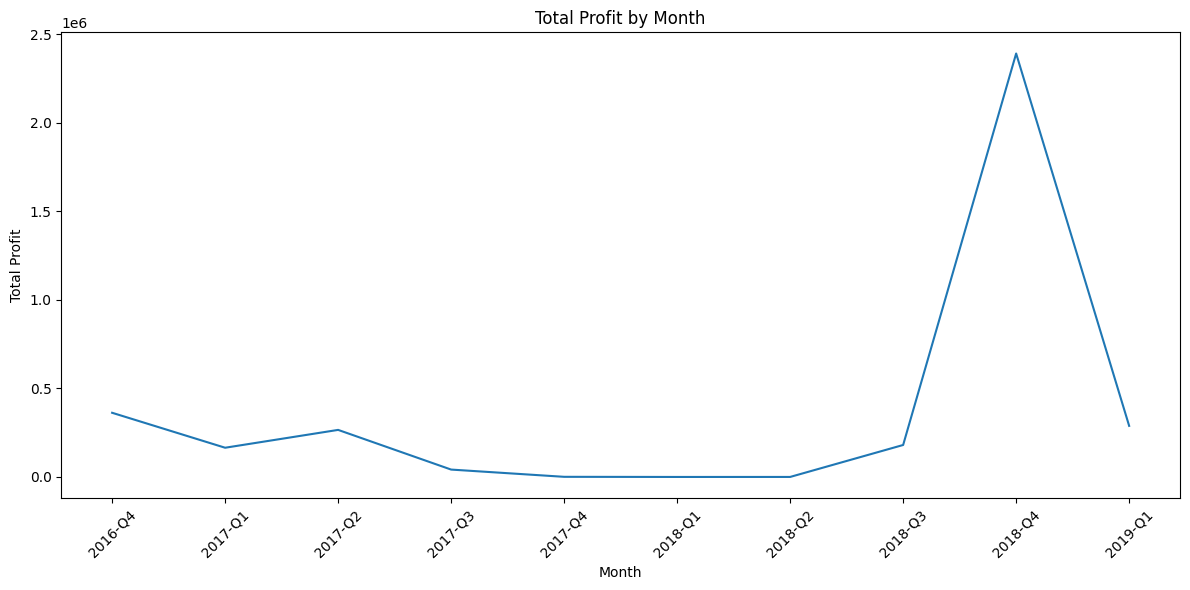

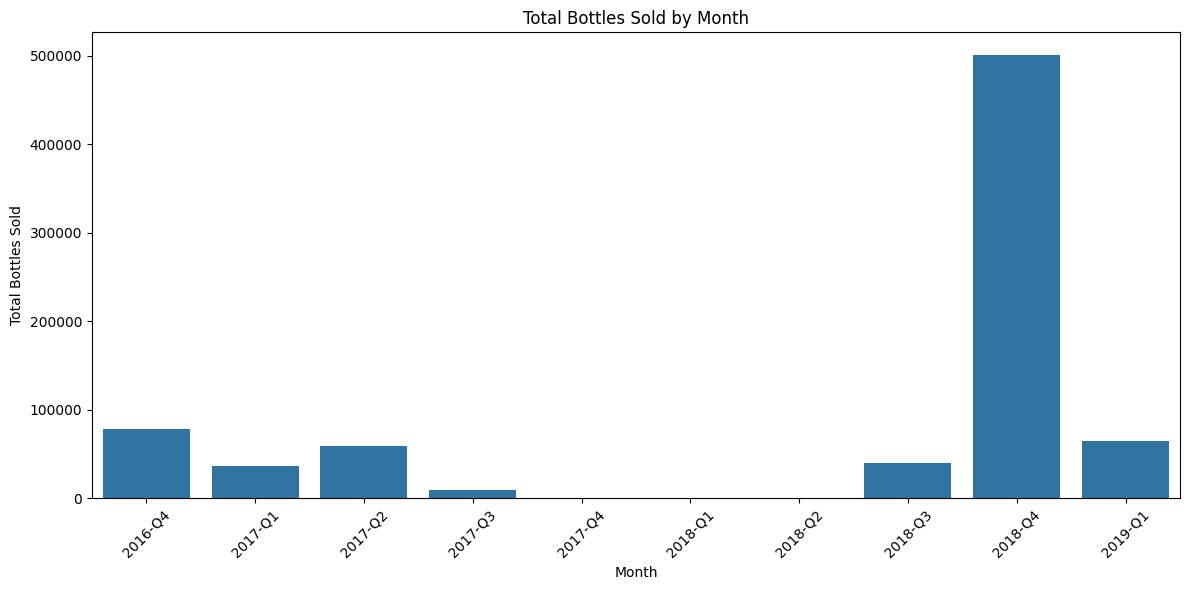

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Month
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter

# Group by Month and calculate the sum of profit and total_bottles_sold
quarterly_sales = df.groupby(['year', 'quarter']).agg({
    'profit': 'sum',
    'total_bottles_sold': 'sum'
}).reset_index()

# Combine Month for plotting
quarterly_sales['year_quarter'] = quarterly_sales['year'].astype(str) + '-Q' + quarterly_sales['quarter'].astype(str)

# Visualize Profit by Month
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_sales, x='year_quarter', y='profit')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Total Bottles Sold by Month (Column Plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_sales, x='year_quarter', y='total_bottles_sold')
plt.title('Total Bottles Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Bottles Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()